This notebook will introduce you to the most typical analysis of electronic structure: Bands, fatbands and projected density of states.

We will do the analysis for graphene on the results of a SIESTA simulation.

In [10]:
import sisl
from sisl import *
import sisl.viz
import plotly.express as px

## Create a graphene structure 
Create a graphene structure and save it for SIESTA calculation

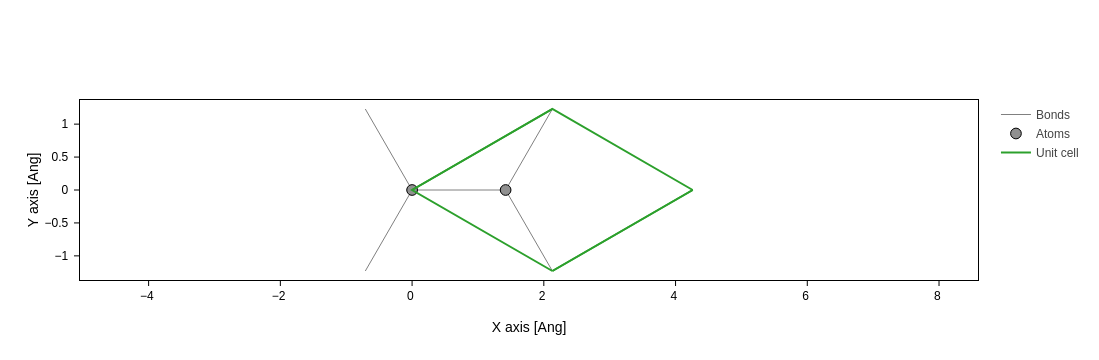

In [5]:
# Create a graphene structure with the default parameters.
graphene = sisl.geom.graphene()
# Plot it to see that it is what we wanted
graphene.plot(axes="x,y")

In [6]:
graphene.write("structure.fdf")

Now you can execute SIESTA and obtain the Hamiltonian for the electronic structure analysis

#### Getting the eigenstates

You could diagonalize this hamiltonian yourself, but there is the `eigenstate` method that automatically does this for you:

It returns an `EigenstateElectron` object, which contains the eigenvalues (`eig`) and the eigenstates (`state`):

In [ ]:
eigenstate.eig, eigenstate.state

#### Plotting a band structure
You could loop through all the $k$ values yourself as you did in the previous tasks, but sisl provides useful objects for sampling k-spaces. One of them is `BandStructure`, which is useful for 1D paths of k points.

**NOTE**: There's also `MonkhorstPack`, which is equivalent to the monkhorst pack grid in SIESTA.

We can now apply the `eigh` method to get the eigen energies for each k point in our sampling:

In [ ]:
band_struct.apply.array.eigh()

But if what we want is to plot the bands, sisl already provides a `plot` method to you:

In [ ]:
band_struct.plot()

And now we can play with it to plot the bands:

Also, the **fatbands**. In fatbands, the width of each band represents the coefficient of a particular basis orbital for that band at that k-point. Usually, you draw multiple orbitals (or groups of orbitals), each in one colour. The **wider the band is for a given color, the more contribution of the orbital to the state** (bigger coefficient).

Here's how you can get them:

In this plot we can see that all atoms contribute exactly equally to each state.

Then there is the **projected density of states** (*PDOS*). A PDOS plot allows you to visualize not only the density of states of a structure, but also how particular basis orbitals (or groups of them) contribute to it. You can easily get it from the hamiltonian. There are several parameters that are crucial for this analysis:
- The k point sampling (`kgrid`).
- The energy range (`Erange`) and number of energy points at which we calculate the DOS (`nE`).
- The function/distribution used to smooth out the curve (`distribution`).

We provide here some good values, but you can play with them:

Graphene with SIESTA
----

**TASK 4:** We performed an analysis of our structure with a tight binding hamiltonian ($H$). However, it really doesn't matter where the $H$ comes from, as long as you have one. You can make SIESTA write the final Hamiltonian with the flag:

```
TS.HS.Save true
```

in your fdf. Rerun one of your graphene calculations with this flag and analyze the bands, fatbands and PDOS as we did with the tight binding hamiltonian. The main difference is that we will now have much more basis orbitals. We can then split the fatbands and PDOS contributions by orbitals and see how different orbitals contribute to them. **Explain the results you get in comparison to the tight binding**.

**NOTE**: Use also `SaveRho true` in your fdf file to make SIESTA store the electronic density ($\rho$, rho), we will then display it just for fun, so that you can see how it can be done and what it looks like.

**NOTE 2**: The plots generated in this notebook are documented [here](https://zerothi.github.io/sisl/visualization/viz_module/index.html#showcase-of-plot-classes) in a very visual way. If you want to change the parameters, you can look at the documentation.

Rerun your calculation, and then use the next cells to get the analysis.

First, we will need to read the hamiltonian from your simulation. Once the simulation is finished you can read it like this:

In [ ]:
# Substitute path/to/your.fdf by the actual path to your fdf.
H = sisl.get_sile("path/to/your.fdf").read_hamiltonian()

In [11]:
H = get_sile("example_calculation/run_1/graphene.fdf").read_hamiltonian()

In [12]:
print(H)

Hamiltonian{non-zero: 11498, orthogonal: False,
 Spin{unpolarized},
 Geometry{na: 2, no: 26,
  Atoms{species: 1,
   Atom{C, Z: 6, mass(au): 12.01100, maxR: 2.53530,
    AtomicOrbital{2sZ1, q0: 2.0, SphericalOrbital{l: 0, R: 2.1467087890171963, q0: 2.0}},
    AtomicOrbital{2sZ2, q0: 0.0, SphericalOrbital{l: 0, R: 1.5310404519545973, q0: 0.0}},
    AtomicOrbital{2pyZ1, q0: 0.6666666666666666, SphericalOrbital{l: 1, R: 2.53530220524999, q0: 2.0}},
    AtomicOrbital{2pzZ1, q0: 0.6666666666666666, SphericalOrbital{l: 1, R: 2.53530220524999, q0: 2.0}},
    AtomicOrbital{2pxZ1, q0: 0.6666666666666666, SphericalOrbital{l: 1, R: 2.53530220524999, q0: 2.0}},
    AtomicOrbital{2pyZ2, q0: 0.0, SphericalOrbital{l: 1, R: 1.801220207627655, q0: 0.0}},
    AtomicOrbital{2pzZ2, q0: 0.0, SphericalOrbital{l: 1, R: 1.801220207627655, q0: 0.0}},
    AtomicOrbital{2pxZ2, q0: 0.0, SphericalOrbital{l: 1, R: 1.801220207627655, q0: 0.0}},
    AtomicOrbital{3dxyZ1P, q0: 0.0, SphericalOrbital{l: 2, R: 2.535302205

And then perform the analysis:

#### Bands

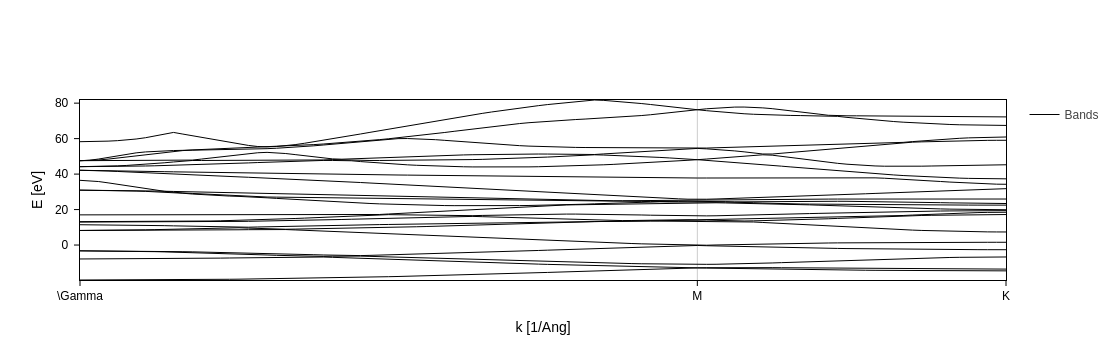

In [17]:
# We need to define a path of k points
band_struct = sisl.BandStructure(H, points=[[0, 0, 0], [2/3, 1/3, 0], [1/2, 0, 0]],
    divisions=100, names=[r"\Gamma", "M", "K"]
)
# Then we can plot the bands
band_struct.plot()

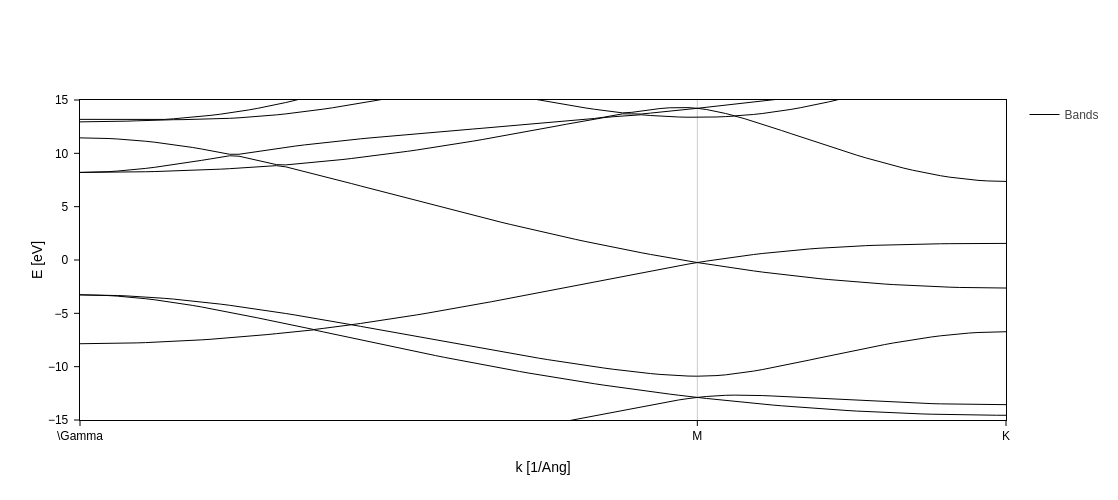

In [20]:
band_struct.plot().update_layout(height=500,yaxis=dict(range=[-15,15]))

#### Fatbands

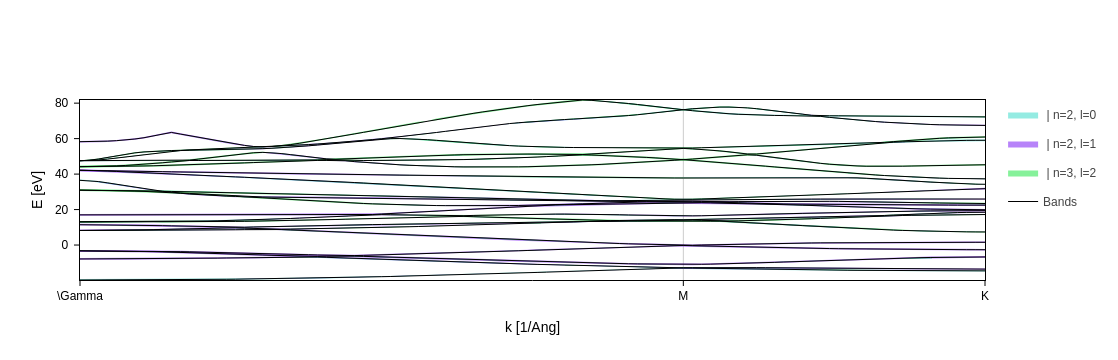

In [14]:
# Get the fatbands plot
fatbands = band_struct.plot.fatbands()
# Split the contributions by the n and l quantum numbers
fatbands.split_groups(on="n+l")

#### PDOS

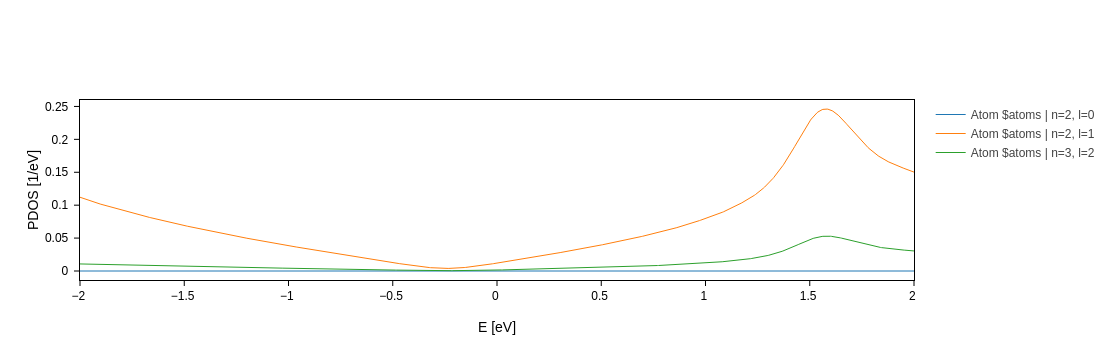

In [15]:
# Get the PDOS plot
pdos_plot = H.plot.pdos(
    kgrid=[90,90,1], nE=1000, Erange=[-10, 10],
    distribution=sisl.get_distribution(method="gaussian", smearing=0.1)
)
# Split the contributions by the n and l quantum numbers
pdos_plot.split_DOS(on="n+l", name="Atom $atoms")

**Just for fun:**

If you have used `SaveRho true`, we can now plot the electronic density ($\rho$, rho):

In [ ]:
rho = sisl.get_sile("path/to/your.fdf").read_grid("RHO")

In [ ]:
rho.plot(axes="xy", plot_geom=True)